# 시계열 데이터 예측 - 주식데이터를 가지고

프로그램 설치  
- conda install pandas-datareader  
- conda install -c conda-forge
- conda install plotly  
- conda install -c conda-forge fbprophet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False 
plt.rcParams["font.family"] = 'Malgun Gothic'

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
! pip install yfinance

     |████████████████████████████████| 6.3MB 6.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=32f4743a12e2e98c7702f643870e281a2220e6a251319eb1f0cf04433ede97b4
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from datetime import datetime
from fbprophet import Prophet
import pandas_datareader as pdr
import yfinance as yf

## 주가 데이터 가져오기  
- 나스닥 QQQ

In [ ]:
start = datetime(2015,1,1)      # 2015년 1월 1일부터 
end = datetime(2021,6,30)        # 2021년 6월 30일까지

In [ ]:
# 지금 안됨
# qqq = pdr.get_data_yahoo('QQQ',start=start,end=end)
# qqq = pdr.DataReader('QQQ',data_source='yahoo',start = '2015-01-01',end = '2021-06-30') 
qqq = yf.download('QQQ',start=start)
qqq.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-25,350.470001,350.720001,348.839996,349.459991,349.459991,28682800
2021-06-28,350.779999,353.850006,350.720001,353.709991,353.709991,39130300
2021-06-29,353.529999,355.019989,352.670013,354.989990,354.989990,29426000
2021-06-30,354.829987,355.230011,353.829987,354.429993,354.429993,32724000
2021-07-01,354.070007,355.089996,352.679993,354.570007,354.570007,29262900


In [ ]:
# 삼성전자의 경우 - 코드 + .KS(한국종목이라서)
sse = yf.download('005930.KS',start=start)
sse.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-28,81700.0,82000.0,81600.0,81900.0,81900.0,11578529
2021-06-29,81900.0,82100.0,80800.0,81000.0,81000.0,15744317
2021-06-30,81100.0,81400.0,80700.0,80700.0,80700.0,13288643
2021-07-01,80500.0,80600.0,80000.0,80100.0,80100.0,13382882
2021-07-02,80000.0,80400.0,79900.0,80100.0,80100.0,4209709


In [ ]:
df = pd.DataFrame({
    'ds' : qqq.index, 'y' : qqq.Close
})
df.head()

,ds,y
Date,,
2015-01-02,2015-01-02,102.940002
2015-01-05,2015-01-05,101.430000
2015-01-06,2015-01-06,100.070000
2015-01-07,2015-01-07,101.360001
2015-01-08,2015-01-08,103.300003


In [ ]:
df.reset_index(inplace=True)
del df['Date']
df.tail()

,ds,y
1631,2021-06-25,349.459991
1632,2021-06-28,353.709991
1633,2021-06-29,354.989990
1634,2021-06-30,354.429993
1635,2021-07-01,354.570007


종가 시각화 

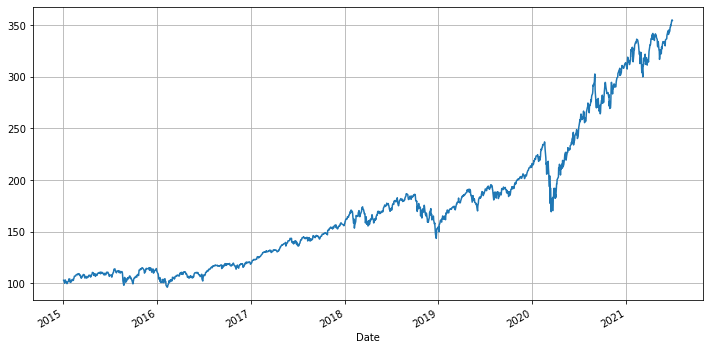

In [ ]:
qqq.Close.plot(figsize=(12,6), grid=True)
plt.show()

## Prophet사용

In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(df)

In [ ]:
# 미래 값 예측하기
future = model.make_future_dataframe(184)
future.tail()

,ds
1815,2021-12-28
1816,2021-12-29
1817,2021-12-30
1818,2021-12-31
1819,2022-01-01


시각화 

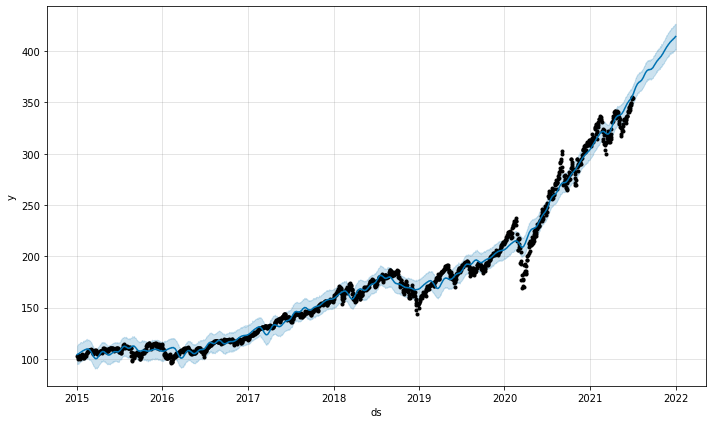

In [ ]:
forecast = model.predict(future)
model.plot(forecast);

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,102.720378,94.924545,113.150603,102.720378,102.720378,1.462552,1.462552,1.462552,0.764308,0.764308,0.764308,-0.074462,-0.074462,-0.074462,0.772707,0.772707,0.772707,0.0,0.0,0.0,104.182930
1,2015-01-05,102.895333,95.084691,113.392512,102.895333,102.895333,1.545694,1.545694,1.545694,0.764308,0.764308,0.764308,-0.088224,-0.088224,-0.088224,0.869610,0.869610,0.869610,0.0,0.0,0.0,104.441026
2,2015-01-06,102.953651,96.426981,113.893179,102.953651,102.953651,1.836938,1.836938,1.836938,0.764308,0.764308,0.764308,0.148595,0.148595,0.148595,0.924034,0.924034,0.924034,0.0,0.0,0.0,104.790589
3,2015-01-07,103.011969,95.323590,114.702786,103.011969,103.011969,1.857879,1.857879,1.857879,0.764308,0.764308,0.764308,0.105049,0.105049,0.105049,0.988521,0.988521,0.988521,0.0,0.0,0.0,104.869848
4,2015-01-08,103.070287,95.092909,114.734995,103.070287,103.070287,1.926663,1.926663,1.926663,0.764308,0.764308,0.764308,0.100118,0.100118,0.100118,1.062236,1.062236,1.062236,0.0,0.0,0.0,104.996950


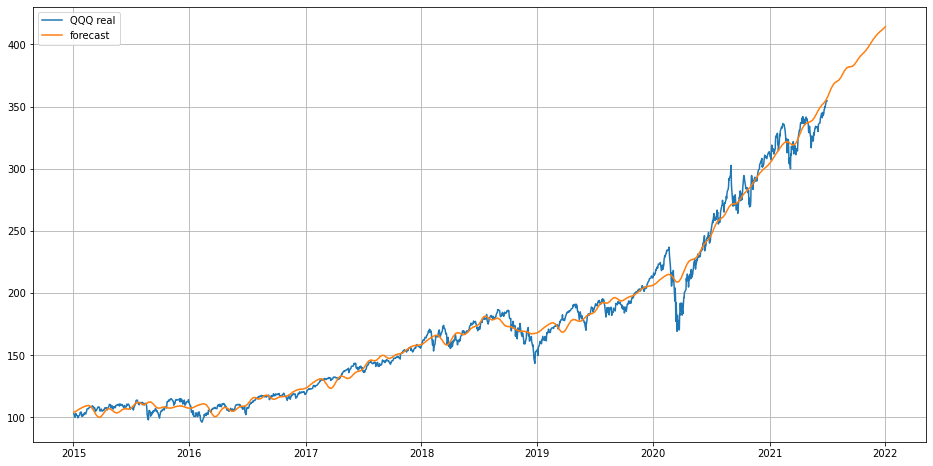

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(qqq.index, qqq.Close, label='QQQ real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()